In [1]:
import numpy as np
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

In [7]:
tokens = ['I', 'will', 'never', 'return', 'there', 'again', '(', 'and', 'now', 'have', 'some', 'serious', 'doubts', 'about', 'the', 'quality', 'of', 'work', 'they', 'actually', 'performed', 'on', 'my', 'car', ')', '.']
print(len(tokens))
print(tokens)

26
['I', 'will', 'never', 'return', 'there', 'again', '(', 'and', 'now', 'have', 'some', 'serious', 'doubts', 'about', 'the', 'quality', 'of', 'work', 'they', 'actually', 'performed', 'on', 'my', 'car', ')', '.']


In [8]:
labels = ['root', 'nsubj', 'aux', 'advmod', 'advmod', 'advmod', 'punct', 'conj', 'punct', 'punct', 'cc', 'advmod', 'obj', 'det', 'amod', 'nmod', 'case', 'det', 'nmod', 'case', 'acl:relcl', 'nsubj', 'advmod', 'obl', 'case', 'nmod:poss']
print(len(labels))
print(labels)

26
['root', 'nsubj', 'aux', 'advmod', 'advmod', 'advmod', 'punct', 'conj', 'punct', 'punct', 'cc', 'advmod', 'obj', 'det', 'amod', 'nmod', 'case', 'det', 'nmod', 'case', 'acl:relcl', 'nsubj', 'advmod', 'obl', 'case', 'nmod:poss']


In [ ]:
prediction:  # sent_id = 14
# text = I will never return there again ( and now have some serious doubts about the quality of work they actually performed on my car ) .                                      
I       _       _       _       _       [0, 4]  root    _       _
will    _       _       _       _       [4, 1]  nsubj   _       _
never   _       _       _       _       [4, 2]  aux     _       _
return  _       _       _       _       [4, 3]  advmod  _       _
there   _       _       _       _       [4, 5]  advmod  _       _
again   _       _       _       _       [4, 6]  advmod  _       _
(       _       _       _       _       [4, 7]  punct   _       _
and     _       _       _       _       [4, 10] conj    _       _
now     _       _       _       _       [4, 25] punct   _       _
have    _       _       _       _       [4, 26] punct   _       _
some    _       _       _       _       [10, 8] cc      _       _
serious _       _       _       _       [10, 9] advmod  _       _
doubts  _       _       _       _       [10, 13]        obj     _       _
about   _       _       _       _       [13, 11]        det     _       _
the     _       _       _       _       [13, 12]        amod    _       _
quality _       _       _       _       [13, 16]        nmod    _       _
of      _       _       _       _       [16, 14]        case    _       _
work    _       _       _       _       [16, 15]        det     _       _
they    _       _       _       _       [16, 18]        nmod    _       _
actually        _       _       _       _       [18, 17]        case    _       _
performed       _       _       _       _       [18, 21]        acl:relcl       _       _
on      _       _       _       _       [21, 19]        nsubj   _       _
my      _       _       _       _       [21, 20]        advmod  _       _
car     _       _       _       _       [21, 24]        obl     _       _
)       _       _       _       _       [24, 22]        case    _       _
.       _       _       _       _       [24, 23]        nmod:poss       _       _

In [20]:
# define the scores
scores = np.full([len(tokens) + 1, len(tokens) + 1], -1.)
scores[(0,4)] = 1
scores[(4,1)] = 1
scores[(4,2)] = 1
scores[(4,3)] = 1
scores[(4,5)] = 1
scores[(4,6)] = 1
scores[(4,7)] = 1
scores[(4,10)] = 1
scores[(4,25)] = 1
scores[(4,26)] = 1
scores[(10,8)] = 1
scores[(10,9)] = 1
scores[(10,13)] = 1
scores[(13,11)] = 1
scores[(13,12)] = 1
scores[(13,16)] = 1
scores[(16,14)] = 1
scores[(16,15)] = 1
scores[(16,18)] = 1
scores[(18,17)] = 1
scores[(18,21)] = 1
scores[(21,19)] = 1
scores[(21,20)] = 1
scores[(21,24)] = 1
scores[(24,22)] = 1
scores[(24,23)] = 1

# print(scores)
# score_tensor = torch.LongTensor(scores)
# print(score_tensor.shape)

In [11]:
def plot_heatmap(scores, sentence):

    # make heatmap with the scores
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(scores, cmap='viridis')

    # set tick labels to the words
    ax.set_xticklabels(sentence, minor=False)
    ax.set_yticklabels(sentence, minor=False)

    # put the major ticks at the middle of each cell
    # and the x-ticks on top
    ax.xaxis.tick_top()
    ax.set_xticks(np.arange(scores.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(scores.shape[0]) + 0.5, minor=False)
    ax.invert_yaxis()

    # display values
    for y in range(scores.shape[0]):
        for x in range(scores.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.0f' % scores[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='w')

    plt.colorbar(heatmap)
    plt.show()


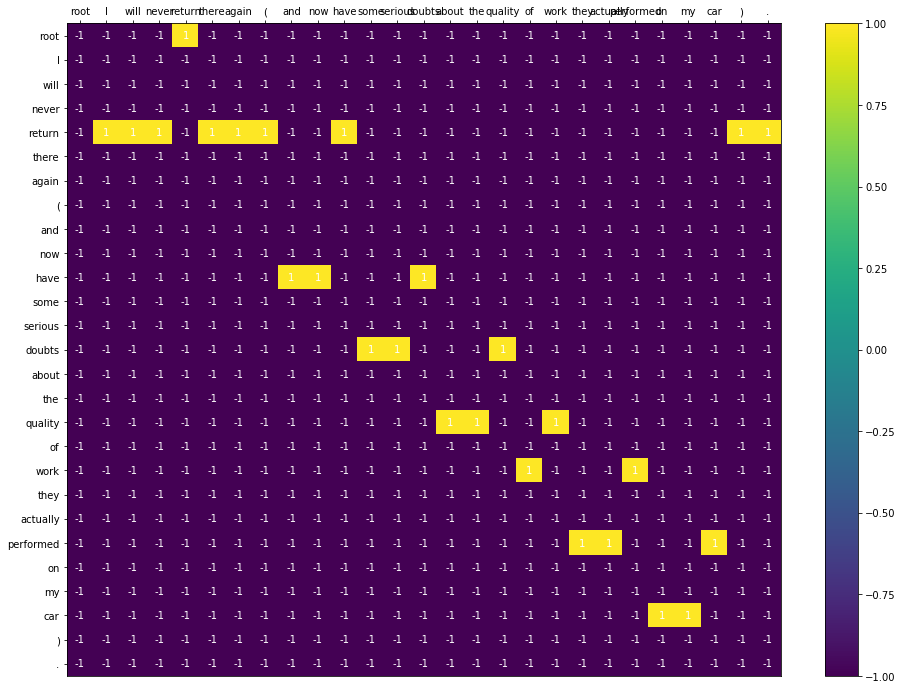

In [22]:
# this sentence is basically perfect.
rooted_tokens = ['root'] + tokens
plot_heatmap(scores, rooted_tokens)

In [ ]:
# a dev sentence

prediction:  # sent_id = 2001
# text = Also , they have great customer service and a very knowledgeable staff
_       Also    _       _       _       _       [0, 4]  root    _       _
_       ,       _       _       _       _       [4, 1]  advmod  _       _
_       they    _       _       _       _       [4, 2]  punct   _       _
_       have    _       _       _       _       [4, 3]  nsubj   _       _
_       great   _       _       _       _       [4, 7]  obj     _       _
_       customer        _       _       _       _       [7, 5]  amod    _       _
_       service _       _       _       _       [7, 6]  compound        _       _
_       and     _       _       _       _       [7, 12] conj    _       _
_       a       _       _       _       _       [11, 10]        advmod  _       _
_       very    _       _       _       _       [12, 8] cc      _       _
_       knowledgeable   _       _       _       _       [12, 9] det     _       _
_       staff   _       _       _       _       [12, 11]        amod    _       _



In [30]:
dev_tokens = ['Also', ',', 'they', 'have', 'great', 'customer', 'service', 'and', 'a', 'very', 'knowledgeable', 'staff']
print(len(dev_tokens))

12


In [2]:
indices = [(0, 4), (4, 1), (4, 2), (4, 3), (4, 7), (7, 5), (7, 6), (7, 12), (11, 10), (12, 8), (12, 9), (12, 11)]
print(len(indices))

12


In [6]:
for i, arc in enumerate(indices):
    print(arc)
    h = arc[0]
    m = arc[1]
    print(i, m)

(0, 4)
0 4
(4, 1)
1 1
(4, 2)
2 2
(4, 3)
3 3
(4, 7)
4 7
(7, 5)
5 5
(7, 6)
6 6
(7, 12)
7 12
(11, 10)
8 10
(12, 8)
9 8
(12, 9)
10 9
(12, 11)
11 11


In [33]:
# define the scores
dev_scores = np.full([len(dev_tokens) + 1, len(dev_tokens) + 1], -1.)

In [39]:
for x in indices:
    h = x[0]
    m = x[1]
    #print(h, m)
    dev_scores[x] = 1

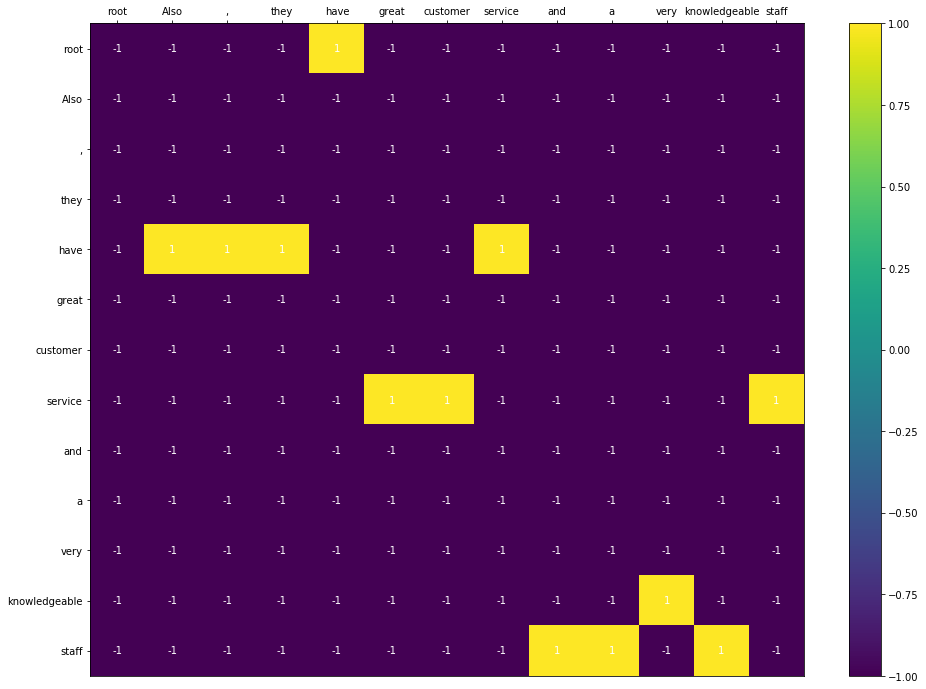

In [41]:
# this sentence is basically perfect.
rooted_tokens = ['root'] + dev_tokens
plot_heatmap(dev_scores, rooted_tokens)

In [ ]:
# the gold sentence
# sent_id = reviews-140302-0004
# text = Also, they have great customer service and a very knowledgeable staff
1       Also    also    ADV     RB      _       4       advmod  4:advmod        SpaceAfter=No
2       ,       ,       PUNCT   ,       _       4       punct   4:punct _
3       they    they    PRON    PRP     Case=Nom|Number=Plur|Person=3|PronType=Prs      4       nsubj   4:nsubj _
4       have    have    VERB    VBP     Mood=Ind|Tense=Pres|VerbForm=Fin        0       root    0:root  _
5       great   great   ADJ     JJ      Degree=Pos      7       amod    7:amod  _
6       customer        customer        NOUN    NN      Number=Sing     7       compound        7:compound      _
7       service service NOUN    NN      Number=Sing     4       obj     4:obj   _
8       and     and     CCONJ   CC      _       12      cc      12:cc   _
9       a       a       DET     DT      Definite=Ind|PronType=Art       12      det     12:det  _
10      very    very    ADV     RB      _       11      advmod  11:advmod       _
11      knowledgeable   knowledgeable   ADJ     JJ      Degree=Pos      12      amod    12:amod _
12      staff   staff   NOUN    NN      Number=Sing     7       conj    4:obj|7:conj:and        _


## trying with model trained on enhanced Dependencies:

In [15]:
e_tokens = ['Also', ',', 'they', 'have', 'great', 'customer', 'service', 'and', 'a', 'very', 'knowledgeable', 'staff']
e_indices = [(0, 4), (4, 1), (4, 2), (4, 3), (4, 7), (4, 12), (7, 5), (7, 6), (7, 12), (11, 10), (12, 8), (12, 9), (12, 11)]
e_labels = ['root', 'advmod', 'punct', 'nsubj', 'obj', 'obj', 'amod', 'compound', 'conj:and', 'advmod', 'cc', 'det', 'amod']

In [16]:
print(len(e_tokens))
print(e_tokens)

12
['Also', ',', 'they', 'have', 'great', 'customer', 'service', 'and', 'a', 'very', 'knowledgeable', 'staff']


In [17]:
print(len(e_indices))
print(e_indices)

13
[(0, 4), (4, 1), (4, 2), (4, 3), (4, 7), (4, 12), (7, 5), (7, 6), (7, 12), (11, 10), (12, 8), (12, 9), (12, 11)]


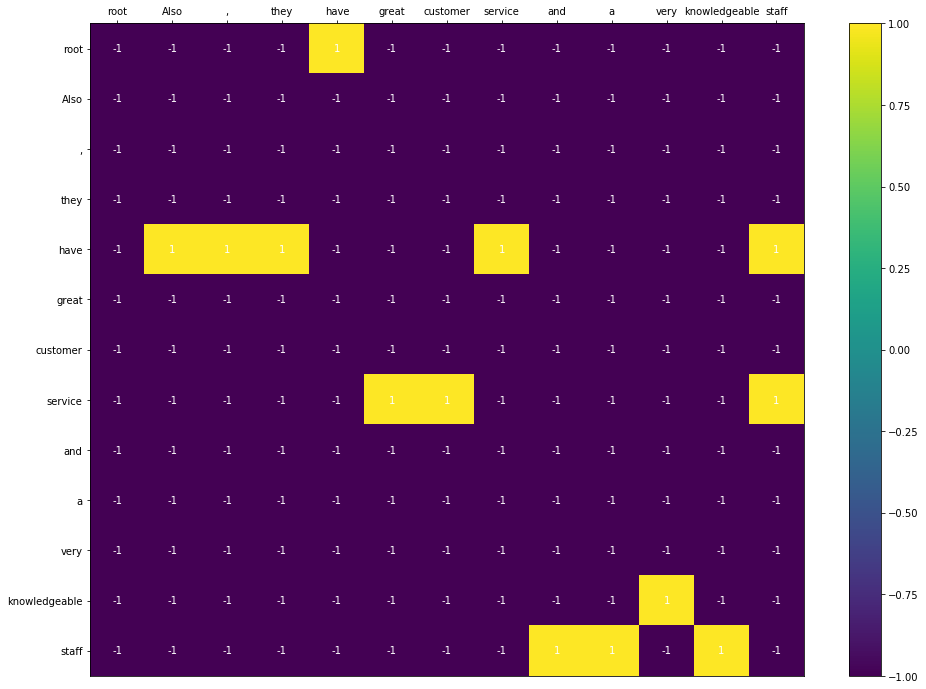

In [26]:
# define the scores
e_dev_scores = np.full([len(e_tokens) + 1, len(e_tokens) + 1], -1.)

for x in e_indices:
    h = x[0]
    m = x[1]
    #print(h, m)
    e_dev_scores[x] = 1
    
    
# this sentence is basically perfect (and it correctly identifies the extra edges to staff)
e_rooted_tokens = ['root'] + e_tokens
plot_heatmap(e_dev_scores, e_rooted_tokens)

In [22]:
## an example from enhanced deps where the model fails to predict some nodes
wtokens = ['There', 'is', 'something', 'wrong', 'or', 'maybe', 'the', 'individual', 'made', 'a', 'mistake', 'but', 'to', 'me', 'that', 'is', 'not', 'integrity', '.']
print(len(wtokens))
print(wtokens)

19
['There', 'is', 'something', 'wrong', 'or', 'maybe', 'the', 'individual', 'made', 'a', 'mistake', 'but', 'to', 'me', 'that', 'is', 'not', 'integrity', '.']


In [28]:
windices = [(0, 2), (2, 1), (2, 3), (2, 9), (2, 19), (3, 4), (8, 7), (9, 5), (9, 6), (9, 8), (9, 11), (9, 14), (11, 10), (14, 13), (18, 16), (18, 17)]
print(len(windices))
print(windices)


gold_indices = [(2, 1), (0, 2), (2, 3), (3, 4), (9, 5), (9, 6), (8, 7), (9, 8), (2, 9), (11, 10), (9, 11), (18,12), (14, 13), (18, 14), (18, 15), (18, 16), (18, 17), (2, 18), (2, 19)]

16
[(0, 2), (2, 1), (2, 3), (2, 9), (2, 19), (3, 4), (8, 7), (9, 5), (9, 6), (9, 8), (9, 11), (9, 14), (11, 10), (14, 13), (18, 16), (18, 17)]


In [41]:
for x in gold_indices:
    h = x[0]
    m = x[1]
    print(h, m)
    w_dev_scores[x] = 10

2 1
0 2
2 3
3 4
9 5
9 6
8 7
9 8
2 9
11 10
9 11
18 12
14 13
18 14
18 15
18 16
18 17
2 18
2 19


In [ ]:
wlabels = ['root', 'expl', 'nsubj', 'conj:or', 'punct', 'amod', 'det', 'cc', 'advmod', 'nsubj', 'obj', 'obl:to', 'det', 'case', 'cop', 'advmod']

In [ ]:

input 1993:  Instance with fields:
 	 tokens: TextField of length 19 with text: 
 		[There, is, something, wrong, or, maybe, the, individual, made, a, mistake, but, to, me, that, is,
		not, integrity, .]
 		and TokenIndexers : {'tokens': 'SingleIdTokenIndexer'} 
 	 metadata: MetadataField (print field.metadata to see specific information). 
 	 pos_tags: SequenceLabelField of length 19 with labels:
 		['PRON', 'VERB', 'PRON', 'ADJ', 'CCONJ', 'ADV', 'DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'CCONJ',
		'ADP', 'PRON', 'PRON', 'AUX', 'PART', 'NOUN', 'PUNCT']
 		in namespace: 'pos_tags'. 
 	 arc_tags: AdjacencyField of length 20
		with indices:
 		[(2, 1), (0, 2), (2, 3), (3, 4), (9, 5), (9, 6), (8, 7), (9, 8), (2, 9), (11, 10), (9, 11), (18,
		12), (14, 13), (18, 14), (18, 15), (18, 16), (18, 17), (2, 18), (2, 19)]

		and labels:
 		['expl', 'root', 'nsubj', 'amod', 'cc', 'advmod', 'det', 'nsubj', 'conj:or', 'det', 'obj', 'cc',
		'case', 'obl:to', 'nsubj', 'cop', 'advmod', 'conj:or', 'punct']
 		in namespace: 'labels'. 


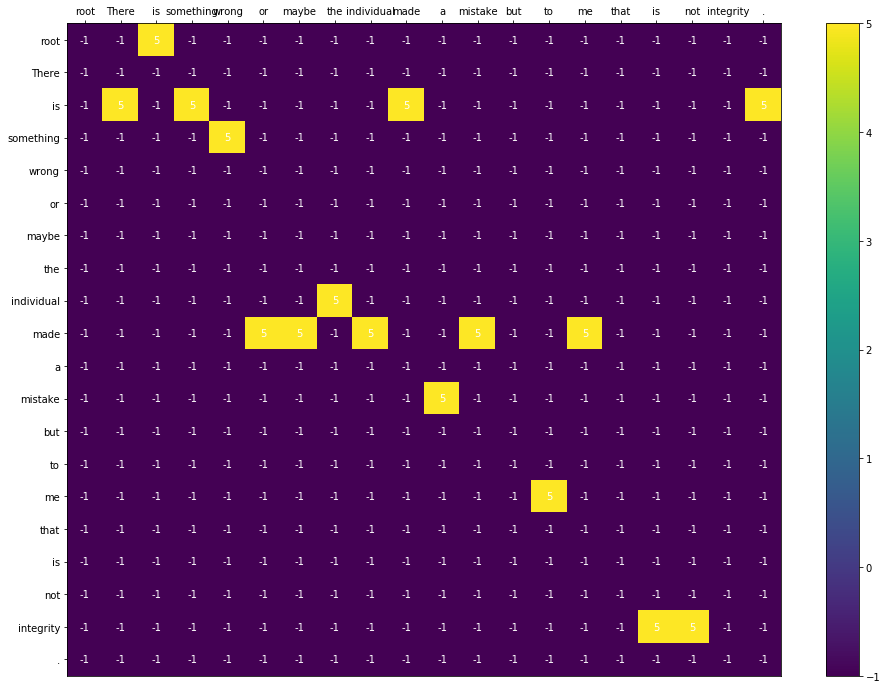

In [38]:
# define the scores
w_dev_scores = np.full([len(wtokens) + 1, len(wtokens) + 1], -1.)

for x in windices:
    h = x[0]
    m = x[1]
    #print(h, m)
    w_dev_scores[x] = 5
    
    
# this sentence is basically perfect (and it correctly identifies the extra edges to staff)
w_rooted_tokens = ['root'] + wtokens
plot_heatmap(w_dev_scores, w_rooted_tokens)

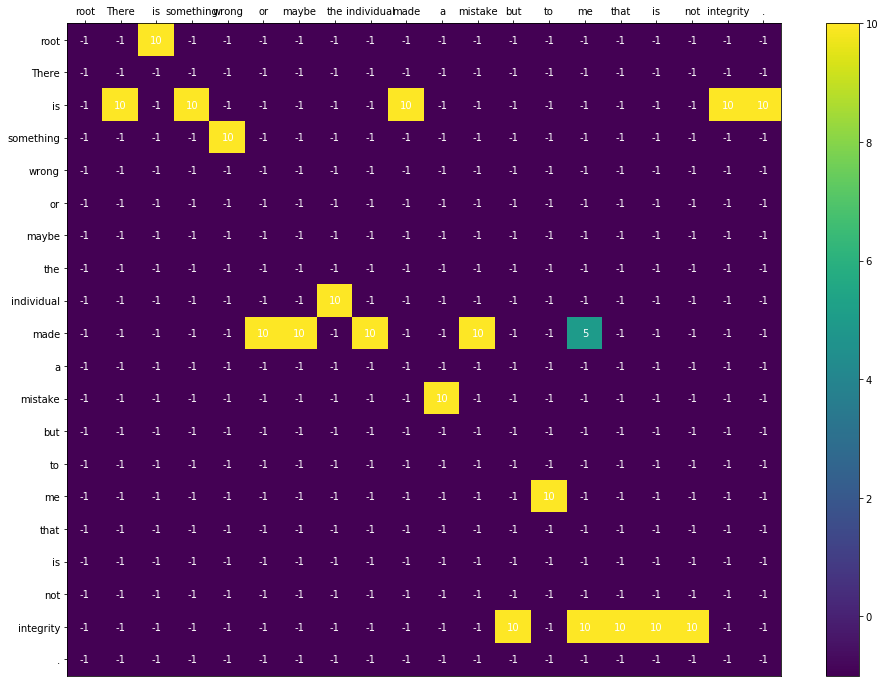

In [42]:
plot_heatmap(w_dev_scores, w_rooted_tokens)